In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import cufflinks as cf

In [2]:
# Import all datas and combine them into a single DataFrame
years = range(1880, 2019)
columns = ['name', 'gender', 'births']
pieces = []

for year in years:
    path = 'baby_names/yob%d.txt' % year
    frame = pd.read_csv(path, names = columns)
    frame['year'] = year
    pieces.append(frame)
    
data = pd.concat(pieces, ignore_index = True)

In [3]:
# Prview the data
data

,name,gender,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1957041,Zylas,M,5,2018
1957042,Zyran,M,5,2018
1957043,Zyrie,M,5,2018
1957044,Zyron,M,5,2018


In [4]:
# Question1 : How many births in each year? 
total_births = data.pivot_table('births', index = 'year', columns = 'gender', aggfunc = sum)
total_births

gender,F,M
year,,
1880,90994,110490
1881,91953,100743
1882,107847,113686
1883,112319,104625
1884,129019,114442
...,...,...
2014,1782350,1916564
2015,1780453,1911537
2016,1766212,1891585


In [5]:
# visulization from table to figure
# total_births.plot(title = 'Total births by sex and year', figsize = (15,5))
total_births.iplot(kind='line',barmode='stack', title = 'Total births by sex and year')
print('The total number of births from 1880 to 2018 in US:         ', total_births.sum().sum())
print('The total number of births(female) from 1880 to 2018 in US: ', total_births.sum()['F'])
print('The total number of births(male) from 1880 to 2018 in US:   ', total_births.sum()['M'])

The total number of births from 1880 to 2018 in US:          351653025
The total number of births(female) from 1880 to 2018 in US:  174079232
The total number of births(male) from 1880 to 2018 in US:    177573793


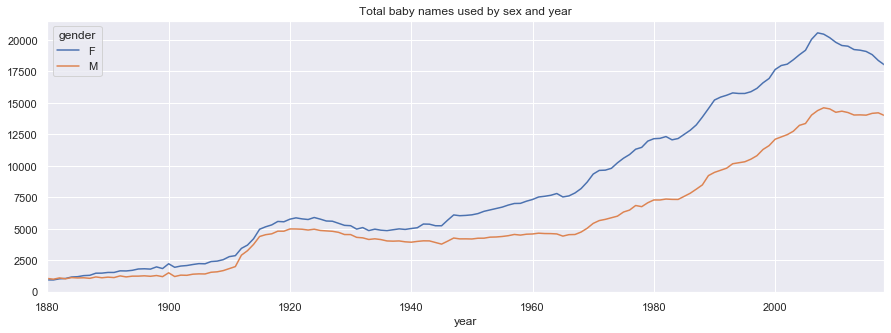

In [6]:
# Question2 : How many baby names used in each year? 
total_names = data.groupby(['year','gender'])['name'].size()
total_names.unstack().plot(title = 'Total baby names used by sex and year', figsize = (15,5))

In [7]:
# Question3 : How is the trend of baby name?
# Create a new column for the first letter of each name, and the further explode the trend of first letter of baby name.
first_letter = data.name.map(lambda x: x[0])
data['first_letter'] = first_letter
data

,name,gender,births,year,first_letter
0,Mary,F,7065,1880,M
1,Anna,F,2604,1880,A
2,Emma,F,2003,1880,E
3,Elizabeth,F,1939,1880,E
4,Minnie,F,1746,1880,M
...,...,...,...,...,...
1957041,Zylas,M,5,2018,Z
1957042,Zyran,M,5,2018,Z
1957043,Zyrie,M,5,2018,Z
1957044,Zyron,M,5,2018,Z


In [8]:
# Two Tables seperated by gender
female_data = data[data['gender'] == 'F']
male_data = data[data['gender'] == 'M']

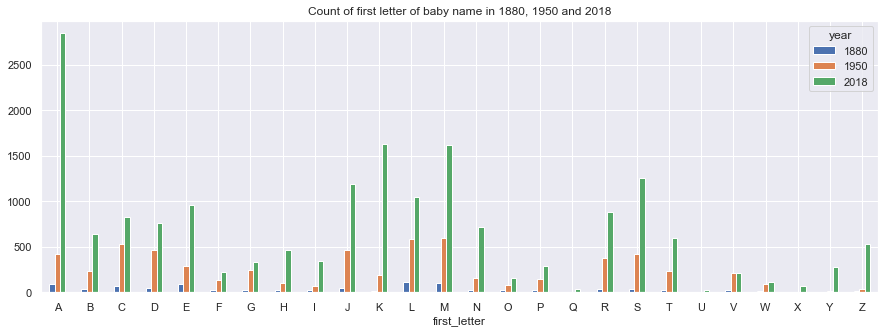

In [9]:
# Next, let's see what we can get from the first letter of baby names. 
# # I focus on the name of female baby, since female name diverses more than male name. And the analytical skills are the same. I dont repeat it here.
female_first_letter = female_data.groupby(['year', 'first_letter']).size().unstack().T
female_first_letter[[1880, 1950, 2018]].plot(title = 'Count of first letter of baby name in 1880, 1950 and 2018', kind = 'bar', rot = 0, figsize = (15,5))

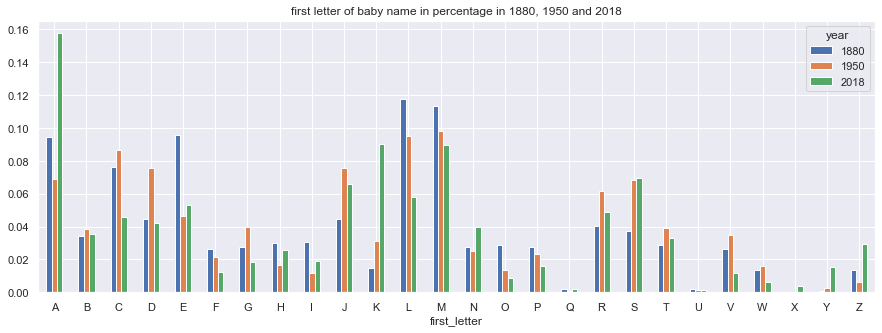

In [10]:
# In percentage:
female_first_letter_percentage = female_first_letter / female_first_letter.sum()
female_first_letter_percentage[[1880, 1950, 2018]].plot(title = 'first letter of baby name in percentage in 1880, 1950 and 2018', kind = 'bar', rot = 0, figsize = (15,5))

In [11]:
# Data for the male baby names:
male_first_letter = male_data.groupby(['year', 'first_letter']).size().unstack().T
# In percentage:
male_first_letter_percentage = male_first_letter / male_first_letter.sum()
# No figure is plotted.

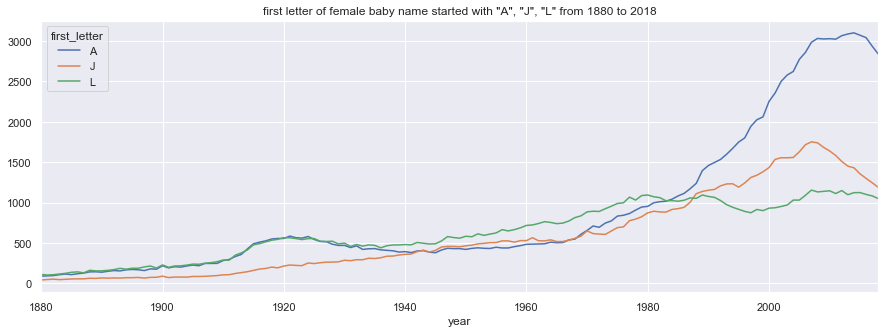

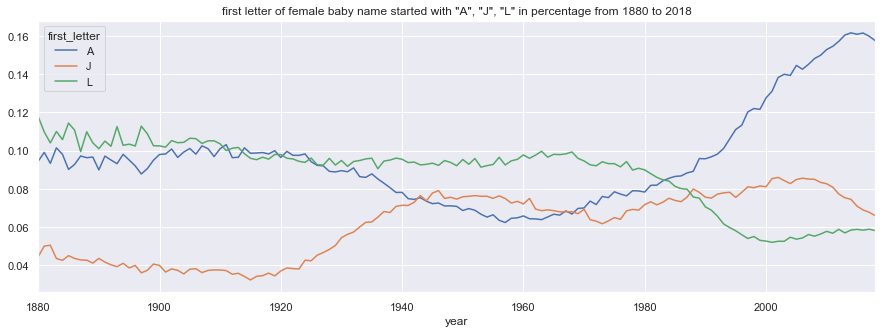

In [12]:
# Question3(continued) : How is the trend of baby name?
# Here, I specially look at female name started with "A", "J", "L".

female_first_letter.loc['Total'] = female_first_letter.sum()
female_first_letter.loc[['A', 'J', 'L']].T.plot(title = 'first letter of female baby name started with "A", "J", "L" from 1880 to 2018', kind = 'line', rot = 0, figsize = (15,5))

female_first_letter_percentage.loc['Total'] = female_first_letter.sum()
female_first_letter_percentage.loc[['A', 'J', 'L']].T.plot(title = 'first letter of female baby name started with "A", "J", "L" in percentage from 1880 to 2018', kind = 'line', rot = 0, figsize = (15,5))

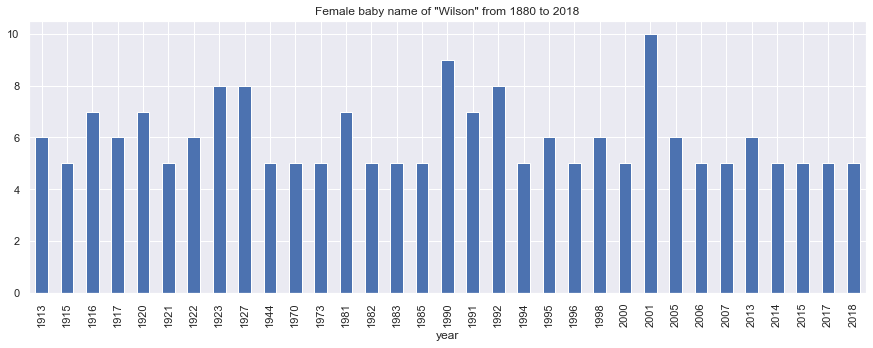

In [13]:
# Question3(continued) : How is the trend of baby name?
# Especially look at one name, take 'Wilson' as example

# Female baby named 'Wilson' by year
wilson = data[data.name == 'Wilson']
wilson_ALL = pd.pivot_table(wilson, 'births', index = 'year', columns = 'gender')
wilson_ALL['F'][~wilson_ALL['F'].isnull()].plot(title = 'Female baby name of "Wilson" from 1880 to 2018', kind = 'bar', xlim = (1880, 2018), y = 'births', figsize = (15,5))

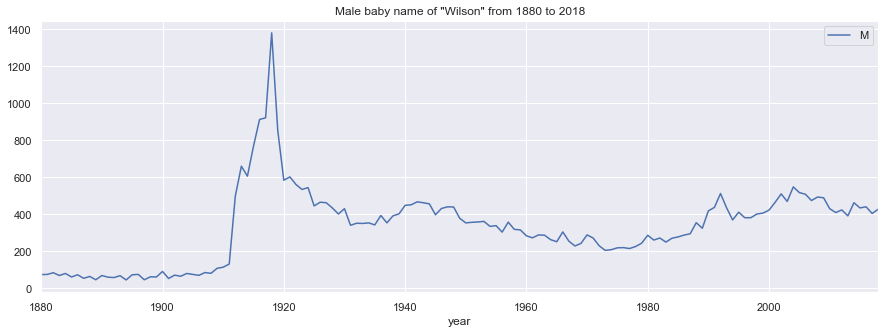

In [14]:
# Male baby named 'Wilson' by year
wilson_ALL.plot(title = 'Male baby name of "Wilson" from 1880 to 2018', y = 'M', figsize = (15,5), kind = 'line')

In [15]:
# Question4: What is the most popular baby name in each year?
# Adding a new column, the percentage of births to the total in each year
def find_percentage(grouping):
    grouping['births_percentage'] = grouping.births / grouping.births.sum()
    return grouping
data2 = data.groupby(['year', 'gender']).apply(find_percentage)

In [16]:
# Question4 (Continued): What is the most popular baby name in each year?
# Code, to filter the top 1000(default) baby name from each year 
def get_rank(grouping, n = 1000):
    return grouping.sort_values(by = 'births', ascending = False)[:n]
data2_top1 = data2.groupby(['year', 'gender']).apply(get_rank, n = 1).reset_index(drop = True)
data2_top1

,name,gender,births,year,first_letter,births_percentage
0,Mary,F,7065,1880,M,0.077642
1,John,M,9655,1880,J,0.087383
2,Mary,F,6919,1881,M,0.075245
3,John,M,8769,1881,J,0.087043
4,Mary,F,8148,1882,M,0.075551
...,...,...,...,...,...,...
273,Noah,M,19117,2016,N,0.010106
274,Emma,F,19800,2017,E,0.011517
275,Liam,M,18798,2017,L,0.010201
276,Emma,F,18688,2018,E,0.011078


In [17]:
# Questino4 (Continued): What is the most popular baby name in each year?
Y = int(input("Input the year, 1880 - 2018"))
G = str(input("Input the gender, F / M").upper())
data2_top1[(data2_top1.year == Y) & (data2_top1.gender == G)]

Input the year, 1880 - 20182018
Input the gender, F / Mf


,name,gender,births,year,first_letter,births_percentage
276,Emma,F,18688,2018,E,0.011078


In [18]:
# Question 5: What is the porportion of the number of baby with common name to the total number of births?
# Adjust the data again, to get the top 500 common names in each year.
data2_top500 = data2.groupby(['year', 'gender']).apply(get_rank, n = 500).reset_index(drop = True)
data2_top500

,name,gender,births,year,first_letter,births_percentage
0,Mary,F,7065,1880,M,0.077642
1,Anna,F,2604,1880,A,0.028617
2,Emma,F,2003,1880,E,0.022012
3,Elizabeth,F,1939,1880,E,0.021309
4,Minnie,F,1746,1880,M,0.019188
...,...,...,...,...,...,...
138995,Frederick,M,575,2018,F,0.000319
138996,Kieran,M,575,2018,K,0.000319
138997,Lawrence,M,573,2018,L,0.000318
138998,Moses,M,573,2018,M,0.000318


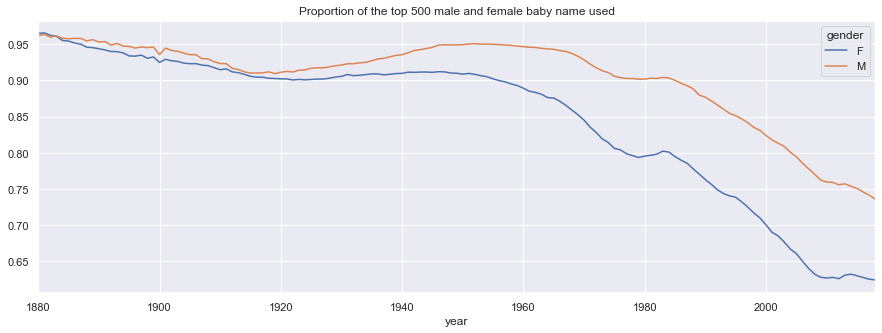

In [19]:
# Question 5(continued) : What is the porportion of the number of baby with common name to the total number of births?
# Plot figure
data_common_name_used = data2_top500.groupby(['year','gender'])['births_percentage'].sum().unstack()
data_common_name_used.plot(title = 'Proportion of the top 500 male and female baby name used', figsize = (15,5), kind = 'line')

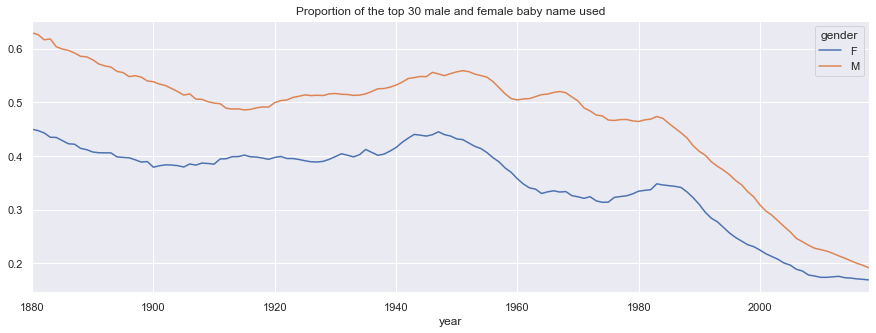

In [20]:
# Question 5(continued) : What is the porportion of the number of baby with common name to the total number of births?
# How about top30?
data2_top30 = data2.groupby(['year', 'gender']).apply(get_rank, n = 30).reset_index(drop = True)
data_common_name_used_2 = data2_top30.groupby(['year','gender'])['births_percentage'].sum().unstack()
data_common_name_used_2.plot(title = 'Proportion of the top 30 male and female baby name used', figsize = (15,5), kind = 'line')

In [21]:
# Question6 : How many baby name were used in the top 50% births?
def get_name_total(grouping, p = 0.5):
    grouping = grouping.sort_values(by = 'births_percentage', ascending = False)
    return grouping.births_percentage.cumsum().values.searchsorted(p) + 1
get_top50 = data2.groupby(['year', 'gender']).apply(get_name_total, p = 0.5)
get_top50 = get_top50.unstack('gender')

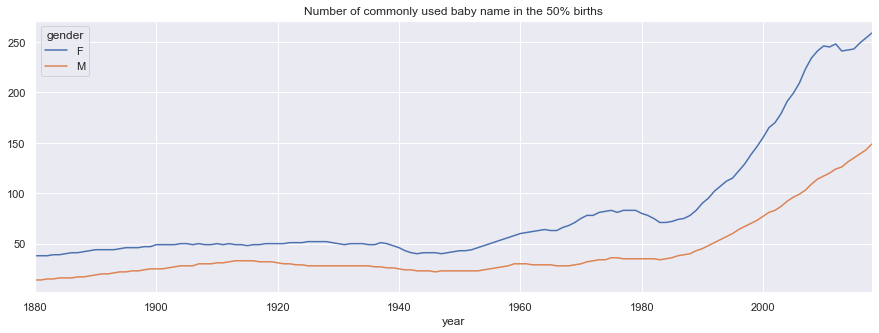

In [22]:
get_top50.plot(title = 'Number of commonly used baby name in the 50% births', figsize = (15,5), kind = 'line')

In [23]:
# Question7 : Is the length of baby name changing by year? For example, more people use a longer/shorter name for their children?
# Prepare the data. Add a new column first.
length = data.name.map(lambda x: len(x))
data2['length'] = length
data_length_female = data2[data2.gender == 'F'].groupby(['year', 'length']).births.sum().unstack()
data_length_male = data2[data2.gender == 'M'].groupby(['year', 'length']).births.sum().unstack()

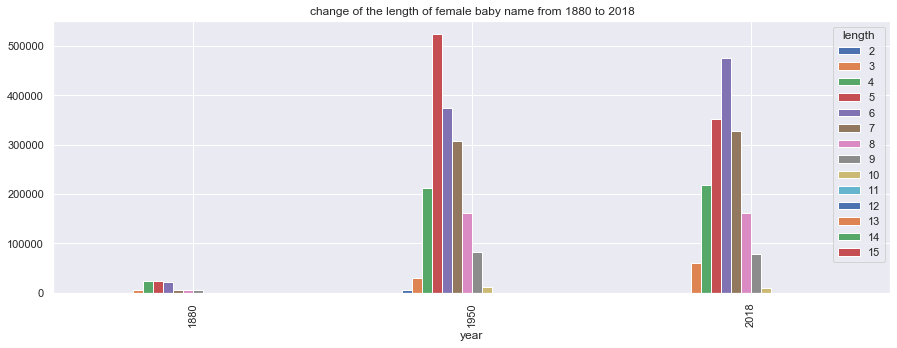

In [24]:
# Only consider female baby name
data_length_female.loc[[1880, 1950, 2018]].plot(title = 'change of the length of female baby name from 1880 to 2018', figsize = (15,5), kind = 'bar')

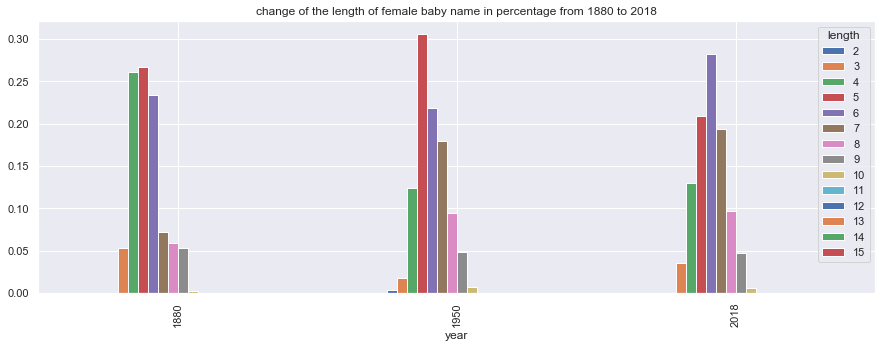

In [25]:
# In percentage
data2_length_percentage_female = data2[data2.gender == 'F'].groupby(['year', 'length']).births_percentage.sum()
data2_length_percentage_female.unstack().loc[[1880, 1950, 2018]].plot(title = 'change of the length of female baby name in percentage from 1880 to 2018', figsize = (15,5), kind = 'bar')

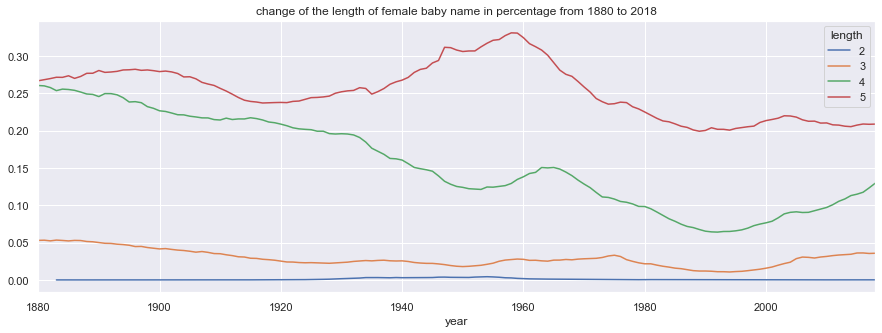

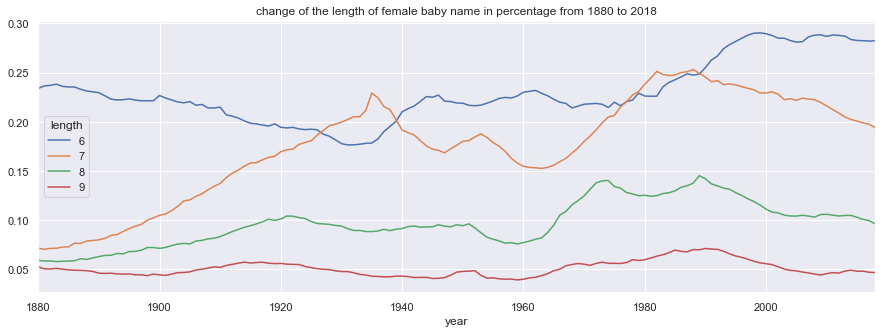

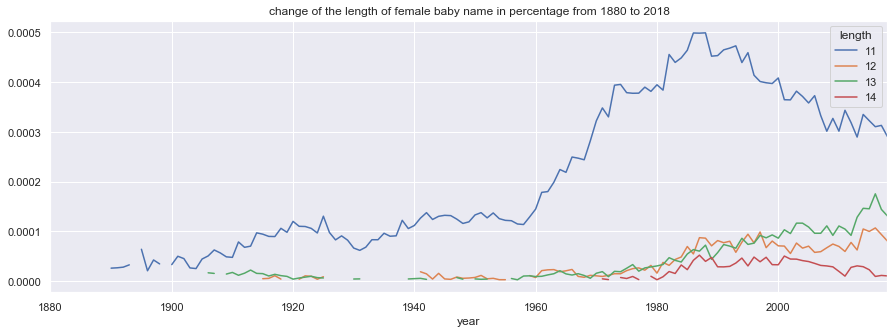

In [26]:
data2_length_percentage_female.unstack()[[2,3,4,5]].plot(title = 'change of the length of female baby name in percentage from 1880 to 2018', figsize = (15,5), kind = 'line')
data2_length_percentage_female.unstack()[[6,7,8,9]].plot(title = 'change of the length of female baby name in percentage from 1880 to 2018', figsize = (15,5), kind = 'line')
data2_length_percentage_female.unstack()[[11,12,13,14]].plot(title = 'change of the length of female baby name in percentage from 1880 to 2018', figsize = (15,5), kind = 'line')